In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sys import getsizeof
import pathlib
from pyusm import usm, usm_entropy
import timeit
from discreteMSE.entropy import apen, sampen

In [46]:
np.set_printoptions(suppress=True)

In [2]:
rng = np.random.default_rng()

In [36]:
alph = 27
states = list(range(alph))
print(states)
a = rng.integers(0, alph, size=200)
b = rng.integers(0, alph, size=500)
c = rng.integers(0, alph, size=1000)
d = rng.integers(0, alph, size=2500)
e = rng.integers(0, alph, size=5000)
f = rng.integers(0, alph, size=10000)
g = rng.integers(0, alph, size=15000)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [38]:
nobs = [200, 500, 1000, 2500, 5000, 10000, 15000]

## Test Performance of Computing USM coords

In [7]:
%%timeit
usm1 = usm.USM.make_usm(a, A=states, deep_copy=False)

1.54 ms ± 294 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
%%timeit
usm1b = usm.USM.make_usm(b, A=states, deep_copy=False)

5.3 ms ± 263 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%%timeit
usm2 = usm.USM.make_usm(c, A=states, deep_copy=False)

6.58 ms ± 490 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%%timeit
usm2d = usm.USM.make_usm(d, A=states, deep_copy=False)

25.1 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
%%timeit
usm3 = usm.USM.make_usm(e, A=states, deep_copy=False)

35.9 ms ± 2.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
%%timeit
usm4 = usm.USM.make_usm(f, A=states, deep_copy=False)

80.6 ms ± 5.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
%%timeit
usm5 = usm.USM.make_usm(g, A=states, deep_copy=False)

109 ms ± 2.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<ErrorbarContainer object of 3 artists>

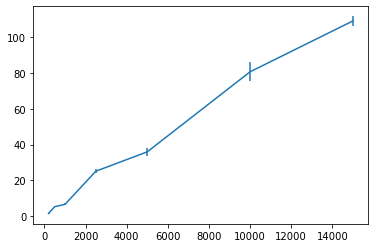

In [54]:
#values from trials on 10/28/2022
usm_meantime = np.array([1.54, 5.30, 6.58, 25.10, 35.90, 80.60, 109])
usm_sdtime = np.array([0.294, 0.263, 0.490, 1.17, 2.25, 5.35, 2.62])
usm_results = np.array([[200., 1.54, 0.294],
       [500., 5.3, 0.263],
       [1000., 6.58, 0.49],
       [2500., 25.1, 1.17],
       [5000., 35.9, 2.25],
       [10000., 80.6, 5.35],
       [15000., 109., 2.62]])

usmtime_fig = plt.figure()
plt.errorbar(usm_results[:, 0], usm_results[:, 1], yerr=usm_results[:, 2])

In [42]:
print(list(zip(nobs, usm_sdtime)))

[(200, 0.294), (500, 0.263), (1000, 0.49), (2500, 1.17), (5000, 2.25), (10000, 5.35), (15000, 2.62)]


## Test Performance of SampEn

Speed of SampEn for N=200 seqs.

In [11]:
%%timeit
sevals = []
mvals = [1, 2, 3, 4]
for m in mvals:
    sevals.append(sampen(a, m)[0])

The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0

The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0

The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0

The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0

The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0

The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0

The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0

The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0

The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0

The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0

The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0

The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0

Last run: 8.78 ms ± 183 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Speed of SampEn for N=500

In [12]:
%%timeit
sevals = []
mvals = [1, 2, 3, 4]
for m in mvals:
    sevals.append(sampen(b, m)[0])

The sequence None is unique, there were no m+1-length matches.
Undefined 12 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 12 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 12 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 12 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 12 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 12 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefin

The sequence None is unique, there were no m+1-length matches.
Undefined 12 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 12 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 12 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 12 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 12 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefined 12 0
The sequence None is unique, there were no m+1-length matches.
Undefined 0 0
The sequence None is unique, there were no m+1-length matches.
Undefin

Last run: 61.3 ms ± 7.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Speed of SampEn for N=1000

In [13]:
%%timeit
sevals = []
mvals = [1, 2, 3, 4]
for m in mvals:
    sevals.append(sampen(c, m)[0])

The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
The sequence None is unique, there were no m+1-length matches.
Undefined 2 0
235 ms ± 7.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Last run: 235 ms ± 7.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Speed of SampEn for N=2500

In [14]:
%%timeit
sevals = []
mvals = [1, 2, 3, 4]
for m in mvals:
    sevals.append(sampen(d, m)[0])

The sequence None is unique, there were no m+1-length matches.
Undefined 16 0
The sequence None is unique, there were no m+1-length matches.
Undefined 16 0
The sequence None is unique, there were no m+1-length matches.
Undefined 16 0
The sequence None is unique, there were no m+1-length matches.
Undefined 16 0
The sequence None is unique, there were no m+1-length matches.
Undefined 16 0
The sequence None is unique, there were no m+1-length matches.
Undefined 16 0
The sequence None is unique, there were no m+1-length matches.
Undefined 16 0
The sequence None is unique, there were no m+1-length matches.
Undefined 16 0
1.36 s ± 27.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Last run: 1.36 s ± 27.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Speed of SampEn for N=5000

In [15]:
%%timeit
sevals = []
mvals = [1, 2, 3, 4]
for m in mvals:
    sevals.append(sampen(e, m)[0])

The sequence None is unique, there were no m+1-length matches.
Undefined 40 0
The sequence None is unique, there were no m+1-length matches.
Undefined 40 0
The sequence None is unique, there were no m+1-length matches.
Undefined 40 0
The sequence None is unique, there were no m+1-length matches.
Undefined 40 0
The sequence None is unique, there were no m+1-length matches.
Undefined 40 0
The sequence None is unique, there were no m+1-length matches.
Undefined 40 0
The sequence None is unique, there were no m+1-length matches.
Undefined 40 0
The sequence None is unique, there were no m+1-length matches.
Undefined 40 0
5.69 s ± 490 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Last run: 5.69 s ± 490 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Speed of SampEn for N=10000

In [16]:
%%timeit
sevals = []
mvals = [1, 2, 3, 4]
for m in mvals:
    sevals.append(sampen(f, m)[0])

23.2 s ± 970 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Last run: 23.2 s ± 970 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Speed of SampEn for N=15000

In [55]:
%%timeit
sevals = []
mvals = [1, 2, 3, 4]
for m in mvals:
    sevals.append(sampen(g, m)[0])

50.9 s ± 1.32 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Last run: 23.2 s ± 970 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

<ErrorbarContainer object of 3 artists>

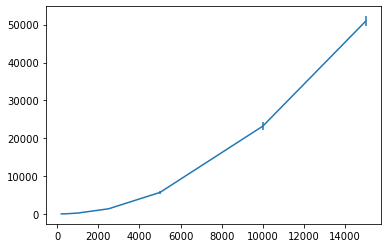

In [58]:
sampen_meantime = [8.78, 61.3, 235, 1360, 5690, 23200]
sampen_sdtime = [0.183, 7.04, 7.87, 27.4, 490, 970]
sampen_results = np.array([[200, 8.78, 0.183],[500, 61.3, 7.04], [1000, 235, 7.87], 
                           [2500, 1360, 27.4], [5000, 5690, 490], [10000, 23200, 970], [15000, 50900, 1320]])
sampentime_fig = plt.figure()
plt.errorbar(sampen_results[:, 0], sampen_results[:, 1], yerr=sampen_results[:, 2])

## Test Performance of ApEn

Speed of ApEn for N=200

In [17]:
%%timeit
sevals = []
mvals = [1, 2, 3, 4]
for m in mvals:
    sevals.append(apen(a, m)[0])

8.37 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Speed of ApEn for N=500

In [18]:
%%timeit
sevals = []
mvals = [1, 2, 3, 4]
for m in mvals:
    sevals.append(apen(b, m)[0])

49.7 ms ± 569 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Speed of ApEn for N=1000

In [19]:
%%timeit
sevals = []
mvals = [1, 2, 3, 4]
for m in mvals:
    sevals.append(apen(c, m)[0])

229 ms ± 14.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Speed of ApEn for N=2500

In [20]:
%%timeit
sevals = []
mvals = [1, 2, 3, 4]
for m in mvals:
    sevals.append(apen(d, m)[0])

1.51 s ± 126 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Speed of ApEn for N=5000

In [21]:
%%timeit
sevals = []
mvals = [1, 2, 3, 4]
for m in mvals:
    sevals.append(apen(e, m)[0])

5.89 s ± 401 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Speed of ApEn for N=10000

In [29]:
%%timeit
sevals = []
mvals = [1, 2, 3, 4]
for m in mvals:
    sevals.append(apen(f, m)[0])

22.3 s ± 717 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Last run: 22.3 s ± 717 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Speed of ApEn for N=15000

In [59]:
%%timeit
sevals = []
mvals = [1, 2, 3, 4]
for m in mvals:
    sevals.append(apen(g, m)[0])

49.7 s ± 627 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Last run: 49.7 s ± 627 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

<ErrorbarContainer object of 3 artists>

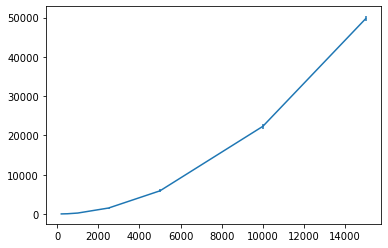

In [60]:
apen_results = np.array([[200, 8.37, 0.166], [500, 49.7, 0.569], [1000, 229, 14.6], 
                         [2500, 1510, 126], [5000, 5890, 401], [10000, 22300, 717], [15000, 49700, 627]])
apentime_fig = plt.figure()
plt.errorbar(apen_results[:, 0], apen_results[:, 1], yerr=apen_results[:, 2])

## Test Performance of USM-Renyi

In [61]:
Sig2v = ('1.778279e-05', '1.778279e-03', '1.778279e-01', '1.778279e+00')
usma = usm.USM.make_usm(a, A=states, deep_copy=False)
usmb = usm.USM.make_usm(b, A=states, deep_copy=False)
usmc = usm.USM.make_usm(c, A=states, deep_copy=False)
usmd = usm.USM.make_usm(d, A=states, deep_copy=False)
usme = usm.USM.make_usm(e, A=states, deep_copy=False)
usmf = usm.USM.make_usm(f, A=states, deep_copy=False)
usmg = usm.USM.make_usm(g, A=states, deep_copy=False)

Speed of USM-renyi for N=200

In [23]:
%%timeit
re = usm_entropy.renyi2usm(usma.fw, sig2v=Sig2v, Plot=False, deep_copy=False)

1.97 ms ± 168 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Speed of USM-renyi for N=500

In [24]:
%%timeit
re = usm_entropy.renyi2usm(usmb.fw, sig2v=Sig2v, Plot=False, deep_copy=False)

13.2 ms ± 705 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Speed of USM-renyi for N=1000

In [25]:
%%timeit
re = usm_entropy.renyi2usm(usmc.fw, sig2v=Sig2v, Plot=False, deep_copy=False)

49.9 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Speed of USM-renyi for N=2500

In [26]:
%%timeit
re = usm_entropy.renyi2usm(usmd.fw, sig2v=Sig2v, Plot=False, deep_copy=False)

298 ms ± 20.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Speed of USM-renyi for N=5000

In [27]:
%%timeit
re = usm_entropy.renyi2usm(usme.fw, sig2v=Sig2v, Plot=False, deep_copy=False)

1.23 s ± 79.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Speed of USM-renyi for N=10000

In [28]:
%%timeit
re = usm_entropy.renyi2usm(usmf.fw, sig2v=Sig2v, Plot=False, deep_copy=False)

4.84 s ± 187 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Speed of USM-renyi for N=15000

In [62]:
%%timeit
re = usm_entropy.renyi2usm(usmg.fw, sig2v=Sig2v, Plot=False, deep_copy=False)

11.1 s ± 477 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<ErrorbarContainer object of 3 artists>

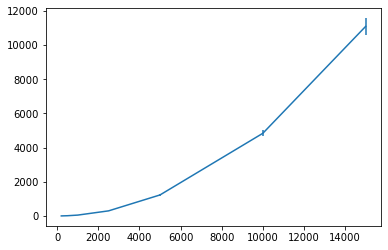

In [63]:
usm_entropy_results = np.array([[200, 1.97, 0.168], [500, 13.2, 0.705], [1000, 49.9, 1.93],
                                [2500, 298, 20.7], [5000, 1230, 79.3], [10000, 4840, 187], [15000, 11100, 477]])
usmentropytime_fig = plt.figure()
plt.errorbar(usm_entropy_results[:, 0], usm_entropy_results[:, 1], yerr=usm_entropy_results[:, 2])